# Loan 데이터 분류나무 예측성능 비교

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df['job'] = df['job'].replace({'Office':0, 'ProfExe':1, 'Other':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [4]:
X = df.drop(['y'], axis=1)
y = df['y']
xname = X.columns
yname = ['Normal','Bad']

## Train/Test 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
# 테스트 사이즈 40%, stratify=y -> y변수를 범주로 삼아서 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

## 나무 모형

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### Pruning

In [7]:
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.005, 0.0001)}, cv=10)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049])})

In [8]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0008}
score   : 0.8960404591430844


### Alpha=0.0008 트리

In [9]:
c1_tree = DecisionTreeClassifier(ccp_alpha=0.0008,random_state=0) 
c1_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008, random_state=0)

### 하이퍼파라미터 튜닝

In [10]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'ccp_alpha': np.arange(0.000, 0.002, 0.0001),
                          'min_impurity_decrease': np.arange(0,0.003,0.0005),
                          'min_samples_split': np.arange(2,402,100)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([  2, 102, 202, 302])})

In [11]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}
score   : 0.8960410273894761


### Alpha=0.0, min_impurity_decrease=0.0005,  min_samples_split=2  트리

In [12]:
c2_tree = DecisionTreeClassifier(ccp_alpha=0.0,min_impurity_decrease=0.0005,min_samples_split=2,random_state=0)
c2_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=0)

### Min_impurity_decrease 튜닝

In [13]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
              param_grid={'min_impurity_decrease': np.arange(0,0.002,0.0001)},
                    cv=10, n_jobs=-1)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'min_impurity_decrease': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019])})

In [14]:
print('selected:',g_cv.best_params_)
print('score   :',g_cv.best_score_)

selected: {'min_impurity_decrease': 0.00030000000000000003}
score   : 0.897471871803614


In [15]:
c3_tree = DecisionTreeClassifier(min_impurity_decrease=0.0003,random_state=0) 
c3_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.0003, random_state=0)

### Default 트리

In [16]:
c4_tree = DecisionTreeClassifier(random_state=0) 
c4_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### ROC 곡선 및 AUC

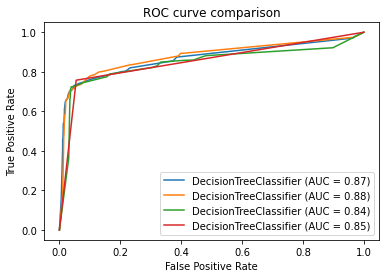

In [24]:
from sklearn.metrics import plot_roc_curve
roc_tree=plot_roc_curve(c1_tree, X_test, y_test)
plot_roc_curve(c2_tree, X_test, y_test, ax = roc_tree.ax_)
plot_roc_curve(c3_tree, X_test, y_test, ax = roc_tree.ax_)
plot_roc_curve(c4_tree, X_test, y_test, ax = roc_tree.ax_)
# ax = roc_tree.ax_ : Axes object to plot on. If None, a new figure and axes is created.
# ax가 없으면 새로운 그림에 다시 그림, ax를 설정 시 한 그래프 안에 그려짐
plt.title("ROC curve comparison")
plt.show()

## 다른 분류방법과의 비교

### 로지스틱 회귀분석

In [25]:
from sklearn.linear_model import LogisticRegression
c_logit = LogisticRegression(random_state=0, max_iter = 1000)
c_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### 신경망분석

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
c_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0, max_iter = 1000)
c_nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=1000, random_state=0)

### SVM

In [27]:
from sklearn import svm
c_svm = svm.SVC(kernel='rbf', random_state=0)
c_svm.fit(X_train_scaled,y_train)

SVC(random_state=0)

### 랜덤포레스트

In [28]:
from sklearn.ensemble import RandomForestClassifier
c_rf = RandomForestClassifier(random_state=0)
c_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### ROC 곡선 및 AUC

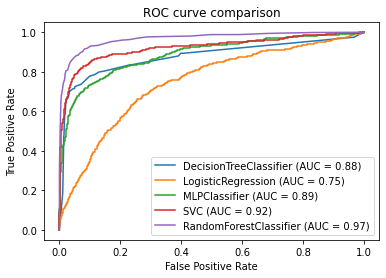

In [29]:
roc_tree=plot_roc_curve(c2_tree, X_test, y_test)
plot_roc_curve(c_logit, X_test, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_nn, X_test_scaled, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_svm, X_test_scaled, y_test, ax = roc_tree.ax_)
plot_roc_curve(c_rf, X_test, y_test, ax = roc_tree.ax_)
plt.title("ROC curve comparison")
plt.show()